In [339]:
import os # This will be used to tell us where the file is
import pandas as pd
import numpy as np
# for the visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px 



In [340]:
pwd = os.getcwd() # This creates a string of the folder this Python Script is stored in

filepath = pwd + "/Uncleaned_DS_jobs.csv" # This creates a string that is the filepath to the simple_csv file
raw_data = pd.read_csv(filepath) # This reads the csv into Python
raw_data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [341]:
cleaned_data = raw_data.copy()

***
Let's explore first our data

In [342]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [343]:
# Check for missing null values
print(cleaned_data.isnull().sum())

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


In [344]:
cleaned_data.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


* Notice the min values of both the Rating and Founded is -1.
* Plus we don't need the index column.

Drop Unnecessary Columns: Index, Competitors \
Both Columns are irrelevant 


In [345]:
# drop the index, Competitors cols.
cleaned_data.drop(['index'], axis=1, inplace=True)
cleaned_data.drop(['Competitors'], axis=1, inplace=True)

#### Handling Null Values

In [346]:
# Check for missing values
print(cleaned_data.isnull().sum())

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


* It's clear that we don't have any null values in the dataset

In [347]:
# Check if any column contains infinite values
cleaned_data.isin([np.inf, -np.inf]).any()

Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
dtype: bool

* Dataset doesn't contain infinity.
***

### Clean and Standardize Columns

##### Handling the Job Title Col.

In [348]:
cleaned_data['Job Title'].value_counts()

Job Title
Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: count, Length: 172, dtype: int64

In [349]:

cleaned_data['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

* We observe that the job tiles consists of primarly Data Scientist, Data Engineer, Machine Learning, Data Analyst etc.
* We can classify Job tiles to make the data set more comprehnisive. 
* We can create new feature about the seniority of the job i.e., Junior, Senior etc.  


In [350]:
# Function to classify the job title col.
def job_title_classifier(title):

    if 'data scientist' in title.lower() or 'data science' in title.lower(): 
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Data Analyst'
    elif 'deep learning' in title.lower():
        return 'Deep Learning Scientist'
    elif 'machine learning' in title.lower():
        return 'Machine Learning Engineer'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'NA'

In [351]:
cleaned_data['Job_Title_Simplified'] = cleaned_data['Job Title'].apply(job_title_classifier)
cleaned_data['Job_Title_Simplified'].value_counts()

Job_Title_Simplified
Data Scientist               474
NA                            55
Data Analyst                  54
Data Engineer                 46
Machine Learning Engineer     35
Manager                        4
Director                       2
Deep Learning Scientist        2
Name: count, dtype: int64

In [352]:
# To classify the seniority of the job
senior = ['senior', 'sr', 'sr.', 'lead', 'principal' ]
junior = ['junior', 'jr', 'jr.']
def seniority_classifier(title):
    if any(item in title.lower() for item in senior):
            return 'Senior'
    elif any(item in title.lower() for item in junior):
        return 'Junior'
    else:
        return 'NA'

In [353]:
cleaned_data['Job_Seniority'] = cleaned_data['Job Title'].apply(seniority_classifier)
cleaned_data['Job_Seniority'].value_counts()

Job_Seniority
NA        576
Senior     94
Junior      2
Name: count, dtype: int64


***
#### Handling the Salary Estimate Col.


In [354]:
cleaned_data['Salary Estimate'].value_counts()

Salary Estimate
$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K

In [355]:
cleaned_data['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

* It will be good if only keep the salary range without the additional un-nessaccery info.

In [356]:
# We split the whole Salary and we keep only the part with the digit e.g. $137K-$171K
cleaned_data['Salary Estimate'] = cleaned_data['Salary Estimate'].apply(lambda salary: salary.split('(')[0] )
# We replace the "$" with empty string
cleaned_data['Salary Estimate'] = cleaned_data['Salary Estimate'].apply(lambda salary: salary.replace('$', '') )
# We replace the "K" with empty string
cleaned_data['Salary Estimate'] = cleaned_data['Salary Estimate'].apply(lambda salary: salary.replace('K', '') )


In [357]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Job_Title_Simplified,Job_Seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,NA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,NA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,NA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,NA


In [358]:
# We will create three cols. Min, Max and Average Salary
cleaned_data['Max_Salary_Estimate'] = cleaned_data['Salary Estimate'].apply(lambda x : int(x.split('-')[1]))
cleaned_data['Min_Salary_Estimate'] = cleaned_data['Salary Estimate'].apply(lambda x : int(x.split('-')[0]))
cleaned_data['Avg_Salary_Estimate'] = (cleaned_data['Max_Salary_Estimate'] + cleaned_data['Min_Salary_Estimate'])//2

In [359]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,NA,171,137,154
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,NA,171,137,154
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,NA,171,137,154
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,NA,171,137,154


***
##### Handling the Rating Col.


In [360]:
cleaned_data['Rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

* -1 rating means we have a missing value, we'll replace it by 0, the min of rating a company can get.

In [361]:

cleaned_data['Rating'] = cleaned_data['Rating'].replace(-1, 0)
cleaned_data['Rating'].unique()

array([3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, 4.7, 3.7, 3.4, 4.1,
       3.2, 4.3, 2.8, 5. , 4.8, 3.3, 2.7, 2.2, 2.6, 4. , 2.5, 4.9, 2.4,
       0. , 2.3, 4.6, 3. , 2.1, 2. ])

***
##### Handling the Company Name Col.

In [362]:
cleaned_data['Company Name'].unique()

array(['Healthfirst\n3.1', 'ManTech\n4.2', 'Analysis Group\n3.8',
       'INFICON\n3.5', 'Affinity Solutions\n2.9', 'HG Insights\n4.2',
       'Novartis\n3.9', 'iRobot\n3.5', 'Intuit - Data\n4.4',
       'XSELL Technologies\n3.6', 'Novetta\n4.5', '1904labs\n4.7',
       'PNNL\n3.7', 'Old World Industries\n3.1',
       'Mathematica Policy Research\n3.4',
       'Guzman & Griffin Technologies (GGTI)\n4.4',
       'Upside Business Travel\n4.1', 'Buckman\n3.5',
       'Insight Enterprises, Inc.\n4.2', 'Tower Health\n3.5',
       'Triplebyte\n3.2', 'PulsePoint\n4.3', 'Exponent\n3.5',
       'Guardian Life\n3.5',
       'Spectrum Communications and Consulting\n3.4',
       'Oversight Systems\n4.7', 'LSQ\n4.2',
       'MIT Lincoln Laboratory\n3.8', 'Kingfisher Systems\n4.5',
       'Formation\n2.8', 'Cohere Health\n5.0', 'Acuity Insurance\n4.8',
       'Chef\n3.6', 'Puget Sound Energy\n3.3', 'Sandhills Global\n2.7',
       'A Place for Mom\n2.7', 'Great-Circle Technologies\n2.2',
       'Edmu

* Compnay Name contains unnecessary element e.g. "\n4.3"

In [363]:
# retreiving only the company name
cleaned_data['Company Name'] = cleaned_data['Company Name'].apply(lambda compnay_name : compnay_name.split('\n')[0])

In [364]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,NA,171,137,154
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,NA,171,137,154
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,NA,171,137,154
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,NA,171,137,154


***
##### Handling the Location Col.


In [365]:
cleaned_data['Location'].value_counts()

Location
San Francisco, CA    69
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Oshkosh, WI           1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: count, Length: 207, dtype: int64

In [366]:
cleaned_data['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

* Most of the job offers are located in the US.
* We notice that the state of the location is at the end of each location

In [367]:
cleaned_data['Location_State'] = cleaned_data['Location'].apply(lambda item : item.split(',')[-1].strip()) 

In [368]:
cleaned_data['Location_State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'Remote', 'TN',
       'TX', 'PA', 'AZ', 'WI', 'GA', 'FL', 'United States', 'NE', 'KS',
       'NH', 'NJ', 'LA', 'OH', 'IN', 'MD', 'CO', 'Utah', 'New Jersey',
       'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA', 'MN', 'OK', 'CT',
       'NC', 'Texas', 'DE', 'California', 'WV'], dtype=object)

In [369]:
replace_with_dic ={'United States':'Unknown', 'Utah':'UT', 'New Jersey':'NJ', 'California':'CA', 'Texas':'TX', 'Remote':'Unknown'}
cleaned_data['Location_State'] = cleaned_data['Location_State'].replace(replace_with_dic)


In [370]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate,Location_State
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,NA,171,137,154,VA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,NA,171,137,154,NY


***
##### Handling the Headquarters Col.


In [371]:
cleaned_data['Headquarters'].value_counts()

Headquarters
New York, NY         33
-1                   31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

* -1 means missing Headquarter location, we'll replace it by Unknown.

In [372]:
cleaned_data['Headquarters'] = cleaned_data['Headquarters'].replace('-1', 'Unkown')
cleaned_data['Headquarters'].value_counts()

Headquarters
New York, NY         33
Unkown               31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

In [373]:
cleaned_data['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

* We noticed that we have cities and their states, plus there are some cities and their countries => we will only extract the cities.

In [374]:
cleaned_data['Headquarters_City'] = cleaned_data['Headquarters'].apply(lambda city : city.split(',')[0] )


In [375]:
cleaned_data['Headquarters_City'].unique()

array(['New York', 'Herndon', 'Boston', 'Bad Ragaz', 'Santa Barbara',
       'Basel', 'Bedford', 'Mountain View', 'Chicago', 'Mc Lean',
       'Saint Louis', 'Richland', 'Northbrook', 'Princeton',
       'Mays Landing', 'Washington', 'Memphis', 'Tempe', 'Reading',
       'San Francisco', 'Menlo Park', 'Atlanta', 'Orlando', 'Lexington',
       'Falls Church', 'Sheboygan', 'Seattle', 'Bellevue', 'Lincoln',
       'Chantilly', 'Santa Monica', 'Ewing', 'South San Francisco',
       'Palo Alto', 'Singapore', 'Cambridge', 'OSAKA', 'Santa Clara',
       'Vienna', 'New Orleans', 'Akron', 'Zurich', 'Woburn', 'Carson',
       'Coral Gables', 'San Ramon', 'Brisbane', 'Winter Park',
       'San Rafael', 'Deerfield', 'Ipswich', 'Carmel', 'Chevy Chase',
       'Hartford', 'Emeryville', 'Rockville', 'Minneapolis', 'Austin',
       'Yakima', 'Santa Cruz', 'South Jordan', 'Reston', 'Denver',
       'Holmdel', 'Aurora', 'San Mateo', 'Goleta', 'Franklin',
       'Indianapolis', 'Lutherville Timonium', 'W

In [376]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate,Location_State,Headquarters_City
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154,NY,New York
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,NA,171,137,154,VA,Herndon
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Boston
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Bad Ragaz
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,NA,171,137,154,NY,New York


***
##### Handling the Size Col.


In [377]:
cleaned_data['Size'].value_counts()

Size
51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: count, dtype: int64

* We will classify the size into four categories:
    * -1 and unknown => unknown
    * size <= 250 => Small
    * 250 < size <= 500 => Medium
    * size > 500  => Large

In [378]:
def size_classifier(num_employees):
    if num_employees == '-1' or num_employees == 'Unknown':
        return 'Unknown'
    if "+" in num_employees:
        num_employees = int(num_employees.split("+")[0])
    else:
        num_employees = int(num_employees.split()[2])
    if num_employees <= 250:
        return 'Small'
    elif num_employees <= 500:
        return 'Medium'
    else:
        return 'Large'
    


In [379]:
cleaned_data['Size_Classified'] = cleaned_data['Size'].apply(size_classifier)

In [380]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate,Location_State,Headquarters_City,Size_Classified
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154,NY,New York,Large
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,Business Services,$1 to $2 billion (USD),Data Scientist,NA,171,137,154,VA,Herndon,Large
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,Business Services,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Boston,Large
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,Manufacturing,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Bad Ragaz,Large
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Business Services,Unknown / Non-Applicable,Data Scientist,NA,171,137,154,NY,New York,Small


***
##### Handling the Founded Col.

In [381]:
cleaned_data['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [382]:
cleaned_data['Founded'].describe()

count     672.000000
mean     1635.529762
std       756.746640
min        -1.000000
25%      1917.750000
50%      1995.000000
75%      2009.000000
max      2019.000000
Name: Founded, dtype: float64

* Remark: there is a "-1" appreaing among the unique values, possibly indicating missing values.

In [383]:
# we chose to replace the Founded values of -1 with the current year i.e., 2024
cleaned_data['Founded'] = cleaned_data['Founded'].replace(-1, 2024) 
cleaned_data["Founded"].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995, 2024,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [384]:
# We add a new feature that indicate years in business of a given company
cleaned_data['Years_in_Business'] = 2024 - cleaned_data['Founded']

In [385]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Job_Title_Simplified,Job_Seniority,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate,Location_State,Headquarters_City,Size_Classified,Years_in_Business
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,Unknown / Non-Applicable,Data Scientist,Senior,171,137,154,NY,New York,Large,31
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,$1 to $2 billion (USD),Data Scientist,NA,171,137,154,VA,Herndon,Large,56
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Boston,Large,43
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,$100 to $500 million (USD),Data Scientist,NA,171,137,154,MA,Bad Ragaz,Large,24
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Unknown / Non-Applicable,Data Scientist,NA,171,137,154,NY,New York,Small,26


***
##### Handling the Type of ownership Col.

In [386]:
cleaned_data['Type of ownership'].value_counts()


Type of ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

* '-1' and 'Unknown' will be replaced by 'Other Organization'

In [387]:
cleaned_data['Type of ownership'] = cleaned_data['Type of ownership'].replace('-1','Unknown')
cleaned_data['Type of ownership'].value_counts()


Type of ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Unknown                            31
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Private Practice / Firm             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

***
##### Handling the Industry Col.

In [388]:
cleaned_data['Industry'].value_counts()

Industry
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [389]:
cleaned_data['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [390]:
cleaned_data['Industry'] = cleaned_data['Industry'].replace('-1', 'Unknown')
cleaned_data['Industry'].value_counts()

Industry
Unknown                                     71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

Let's group the industries into borader categories 

In [391]:
# Function to categorize the industry col.
def categorize_industry(industry):
    tech = ['IT Services', 'Computer Hardware & Software', 'Internet',
            'Telecommunications Services', 'Video Games', 'Cable, Internet & Telephone Providers']
    finance_insurance = ['Insurance Carriers', 'Investment Banking & Asset Management',
                         'Insurance Agencies & Brokerages', 'Banks & Credit Unions',
                         'Financial Transaction Processing', 'Venture Capital & Private Equity',
                         'Lending', 'Accounting']
    healthcare_pharma = ['Biotech & Pharmaceuticals', 'Health Care Services & Hospitals', 'Health, Beauty, & Fitness']
    manufacturing = [ 'Electrical & Electronic Manufacturing', 'Consumer Products Manufacturing',
                     'Industrial Manufacturing', 'Chemical Manufacturing', 'Food & Beverage Manufacturing',
                     'Miscellaneous Manufacturing', 'Transportation Equipment Manufacturing', 'Telecommunications Manufacturing']
    consulting_services = ['Advertising & Marketing','Research & Development', 'Consulting', 'Enterprise Software & Network Solutions',
                           'Staffing & Outsourcing', 'Transportation Management',
                            'Architectural & Engineering Services', 'Farm Support Services', 'Social Assistance',
                           'Construction', 'Publishing']
    energy_utilities = ['Energy', 'Utilities', 'Oil & Gas Services', 'Timber Operations']
    retail = ['Consumer Electronics & Appliances Stores','Food & Beverage Stores', 'Other Retail Stores', 'Department, Clothing, & Shoe Stores']
    hospitality = ['Hotels, Motels, & Resorts', 'Travel Agencies']
    government_education = ['Federal Agencies', 'State & Regional Agencies', 'Colleges & Universities']
    real_estate_construction = ['Real Estate']
    space = ['Aerospace & Defense']
    trans_logistics = ['Rail','Logistics & Supply Chain','Express Delivery Services', 'Shipping']
    

    if industry in tech:
        return 'Technology'
    elif industry in finance_insurance:
        return 'Finance & Insurance'
    elif industry in healthcare_pharma:
        return 'Healthcare & Pharmaceuticals'
    elif industry in manufacturing:
        return 'Manufacturing'
    elif industry in consulting_services:
        return 'Consulting & Services'
    elif industry in energy_utilities:
        return 'Energy & Utilities'
    elif industry in retail:
        return 'Retail'
    elif industry in government_education:
        return 'Government & Education'
    elif industry in real_estate_construction:
        return 'Real Estate & Construction'
    elif industry in space:
        return 'Space'
    elif industry in hospitality:
        return 'Hospitality'
    elif industry in trans_logistics:
        return 'Transportation & Logistics'
    elif industry in 'News Outlet': 
        return "Media & Communications"
    elif industry in 'Wholesale':
        return "Distribution & Wholesale"
    else:
        return 'Other'

In [392]:
cleaned_data['Industry'] = cleaned_data['Industry'].apply(categorize_industry)
cleaned_data['Industry'].value_counts()

Industry
Consulting & Services           166
Technology                      154
Healthcare & Pharmaceuticals     89
Other                            71
Finance & Insurance              68
Space                            46
Manufacturing                    24
Government & Education           20
Energy & Utilities               12
Retail                            7
Transportation & Logistics        5
Real Estate & Construction        3
Hospitality                       3
Distribution & Wholesale          3
Media & Communications            1
Name: count, dtype: int64

***
##### Handling the Sector Col.

In [393]:
cleaned_data['Sector'].value_counts()

Sector
Information Technology                188
Business Services                     120
-1                                     71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

In [394]:
# we replace -1 with Unknown
cleaned_data['Sector'] = cleaned_data['Sector'].replace('-1', 'Unknown')
cleaned_data['Sector'].value_counts()


Sector
Information Technology                188
Business Services                     120
Unknown                                71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

***
##### Handling the Job Revenue Col.

In [395]:
cleaned_data['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64

In [396]:
# Replacing -1 and 'Unknown / Non-Applicable' with Unknown
cleaned_data['Revenue'] = cleaned_data['Revenue'].replace({'-1': 'Unknown', 'Unknown / Non-Applicable':  'Unknown'})
cleaned_data['Revenue'].value_counts()



Revenue
Unknown                             240
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64

***
##### Handling the Job Description Col.

In [397]:
print(cleaned_data['Job Description'][1])

Secure our Nation, Ignite your Future

Join the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous

The successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.

Duties, Tasks & Responsibilities
Working with large, complex, and disparate data sets
Designing and implementing innovative ways to analyze and exploit the Sponsors data holdings
Researching and reporting on a w

* we will try to retrive the skills that are demanded in each Job Description.

In [398]:
# let's combine all the skills in a list and apply the same thing 
tech_skills = ['Python', 'R', 'SQL', 'Excel', 'Tableau', 'Power BI','Hadoop', 'Spark','AWS', 'Azure',
               'Git', 'Web Scraping', 'Big Data']

for skill in tech_skills:
    cleaned_data[skill] = cleaned_data['Job Description'].apply(lambda descrip: 1 if skill.lower() in descrip.lower() else 0 ) # 1 means skill is required, 0 means it's not.


In [399]:
cleaned_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Excel,Tableau,Power BI,Hadoop,Spark,AWS,Azure,Git,Web Scraping,Big Data
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,0,0,0,0,1,1,0,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,0,0,1,0,0,0,0,0,1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,1,0,0,0,0,1,0,0,0,0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,0,0,0,0,1,0,1,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,0,0,0,0,0,0


In [400]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             672 non-null    object 
 1   Salary Estimate       672 non-null    object 
 2   Job Description       672 non-null    object 
 3   Rating                672 non-null    float64
 4   Company Name          672 non-null    object 
 5   Location              672 non-null    object 
 6   Headquarters          672 non-null    object 
 7   Size                  672 non-null    object 
 8   Founded               672 non-null    int64  
 9   Type of ownership     672 non-null    object 
 10  Industry              672 non-null    object 
 11  Sector                672 non-null    object 
 12  Revenue               672 non-null    object 
 13  Job_Title_Simplified  672 non-null    object 
 14  Job_Seniority         672 non-null    object 
 15  Max_Salary_Estimate   6

In [401]:
cleaned_data.describe()

,Rating,Founded,Max_Salary_Estimate,Min_Salary_Estimate,Avg_Salary_Estimate,Years_in_Business,Python,R,SQL,Excel,Tableau,Power BI,Hadoop,Spark,AWS,Azure,Git,Web Scraping,Big Data
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.593006,1991.110119,148.130952,99.196429,123.476190,32.889881,0.730655,1.0,0.529762,0.440476,0.183036,0.050595,0.212798,0.281250,0.258929,0.074405,0.218750,0.002976,0.206845
std,1.176684,39.910217,48.035110,33.009958,39.596166,39.910217,0.443950,0.0,0.499485,0.496814,0.386984,0.219333,0.409591,0.449944,0.438373,0.262624,0.413707,0.054514,0.405345
min,0.000000,1781.000000,56.000000,31.000000,43.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1983.000000,119.000000,79.000000,103.000000,9.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,2004.000000,133.000000,91.000000,114.000000,20.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,2015.000000,165.000000,122.000000,136.000000,41.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2024.000000,331.000000,212.000000,271.000000,243.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [402]:
# Saving our cleaned data
cleaned_data.to_csv('DS_Jobs_Cleaned.csv', index=False)


***
### Exploring the most Common Job Titles

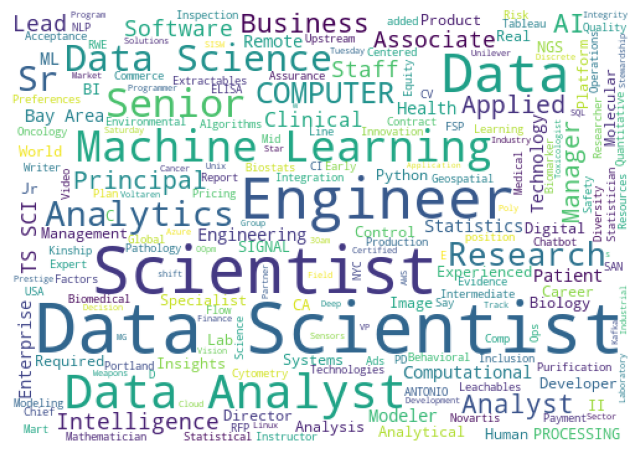

In [403]:
# Most common words in job titles
job_titles = cleaned_data["Job Title"].unique()
plt.subplots(figsize= (8,8))
wordcloud = WordCloud(  background_color = "white", width = 500, height = 350).generate(" ".join(job_titles))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()

* We observe that the top job titles are:
  * **Data Scientist**
  * **Machine Learning**
  * **Data Analyst**
  * **Data Engineer**

We know that the majority of job offers are located at the **US**, in addition to this, the top job title is data scientist(this is job title we are interested in). \
The following sections will focus only on that, i.e. Data Scientist jobs in the US.

In [404]:
# Filter the dataset to include only rows with 'Data Scientist' in the job title
ds_us_df = cleaned_data[cleaned_data['Job_Title_Simplified'].str.contains('Data Scientist', case=False)]

# Group by state and count the number of jobs in each state
jobs_per_state = ds_us_df.groupby('Location_State').size().reset_index(name='Number of Jobs')

# Sorting the the jobs_per_state in ascending order for visualization purposes.
jobs_per_state = jobs_per_state.sort_values('Number of Jobs', ascending=True)
# Dropping the jobs that has Unknown as a state.
index_of_unknown = jobs_per_state.index[jobs_per_state['Location_State']== 'Unknown']
jobs_per_state = jobs_per_state.drop(index_of_unknown)

### Data Scientist Jobs per State

In [405]:
# Plot the horizontal bar chart
fig = px.bar(jobs_per_state, 
             x='Number of Jobs', 
             y='Location_State', 
             orientation='h', 
             color='Number of Jobs',
             color_continuous_scale="sunsetdark",
             title='Data Scientist Jobs per State',
             text='Number of Jobs')

# Update layout for better readability
fig.update_layout(xaxis_title='Number of Jobs',
                  yaxis_title='',
                  yaxis=dict(tickmode='linear'),
                  template='plotly_white',
                  margin_pad=5,
                  coloraxis_showscale=False,
                  margin=dict(l=20, r=20, t=40, b=1)  )

# Show the plot
fig.show()

In [406]:
# Create a choropleth map
fig = px.choropleth(jobs_per_state, 
                    locations='Location_State', 
                    locationmode='USA-states',
                    color='Number of Jobs',
                    color_continuous_scale="sunsetdark",
                    range_color=(0, jobs_per_state['Number of Jobs'].max()),
                    scope='usa',
                    title='Distribution of Data Scientist Jobs per State ')

fig.show()

In [407]:
# Show 5 top states with the highest Job offers
Top_5_states = jobs_per_state.iloc[-5:]
# Plot the horizontal bar chart
fig = px.bar(Top_5_states, 
             x='Number of Jobs', 
             y='Location_State', 
             orientation='h', 
             color='Number of Jobs',
             color_continuous_scale="sunsetdark",
             title='Top Five States with Data Scientist Positions',
             text='Number of Jobs')

# Update layout for better readability
fig.update_layout(xaxis_title='Number of Jobs',
                  yaxis_title='',
                  yaxis=dict(tickmode='linear'),
                  template='plotly_white',
                  margin_pad=5,
                  coloraxis_showscale=False,
                  margin=dict(l=20, r=20, t=40, b=1)  )

# Show the plot
fig.show()

* We observe that **California** has the highest job offers. The second state with the highest job offers is **Virginia**, after that **Massachusetts**, **New York** and **Maryland**.
* The majority of the job offers are concentrated in these 5 states.
  

### Exploring the Skills Highly Sought-after by Companies 

In [408]:
# show skills highly sought after by companies 
# tech_skills is a list of str skills e.g. 'R', 'Python' etc
skill_counts = ds_us_df[tech_skills].sum(axis=0).sort_values().to_frame(name='count')


# Plot the horizontal bar chart
fig = px.bar(skill_counts, 
             x='count', 
             y=skill_counts.index, 
             orientation='h', 
             color='count',
             color_continuous_scale="sunsetdark",
             title='Skill Demand Distribution',
             text='count')

# Update layout for better readability
fig.update_layout(xaxis_title='Number of Jobs',
                  yaxis_title='',
                  yaxis=dict(tickmode='linear'),
                  template='plotly_white',
                  margin_pad=5,
                  coloraxis_showscale=False,
                  margin=dict(l=20, r=20, t=40, b=1)  )

# Show the plot
fig.show()

* We observe that the top three skills highly demanded by the market are **R**, **Python**, and **SQL**.
* Possessing these skills will significantly enhance candidate chances of getting job interviews and securing positions in the field.

### Exploring Industry Distribution among the Job Offers

In [409]:
# Show Industry Distribution

industry_counts = ds_us_df['Industry'].value_counts().sort_values().to_frame(name='count')

# Plot the horizontal bar chart
fig = px.bar(industry_counts, 
             x='count', 
             y=industry_counts.index, 
             orientation='h', 
             color='count',
             color_continuous_scale="sunsetdark",
             title='Jobs Distribution per Industry',
             #labels={'Number of Jobs':'Number of Jobs', 'State':'State'},
             text='count')

# Update layout for better readability
fig.update_layout(xaxis_title='Number of Jobs',
                  yaxis_title='',
                  yaxis=dict(tickmode='linear'),
                  template='plotly_white',
                  margin_pad=5,
                  coloraxis_showscale=False,
                  margin=dict(l=20, r=20, t=40, b=1)  )

# Show the plot
fig.show()

* We observe that most of the jobs are in **Consulting & Services** and **Technology**. It is worth noting that there are significant job offers in an unspecified industry (Other).
* Other industries that have considerable job offers are **Healthcare & Pharmaceuticals**, **Finance & Insurance**, and **Space**.

### Exploring Salary Distribution of all the Job Offers

In [410]:
# Show Distribution of salaries 
salaries_range = ['Max_Salary_Estimate','Min_Salary_Estimate']
all_salaries = pd.concat([ds_us_df[salaries_range[1]], ds_us_df[salaries_range[0]]] ).to_frame('salary')


In [411]:
fig = px.histogram(all_salaries,
                   x='salary',
                   nbins=30,
                   color_discrete_sequence=['purple']
             )

# Update layout for better readability
fig.update_layout(xaxis_title='Salary in USD',
                  xaxis_tickprefix = '$', 
                  xaxis_tickformat = ',.3f',
                  yaxis_title='Count',
                  bargap=0.1,
                  template='plotly_white',
                  margin_pad=5,
                  coloraxis_showscale=False,
                  margin=dict(l=20, r=20, t=40, b=10)  )

fig.show()


* We observe that the majority of job postings offer salaries between **$75K** to **$150K**, indicating that this range is typical for many positions. Moreover, this suggests that many employers find this range appropriate for the roles advertised.
* Jobs with salaries above **$180K** are less common, indicating that higher compensation is available for roles likely requiring specialized skills or higher levels of experience.
* Jobs with salaries below **$70K** are fewer, These could be entry-level positions or roles in industries or regions with lower pay scales.

# Conclusion
Based on the analysis of job postings of data scientist in the USA, several key insights have emerged:

### Geographic Distribution:

- **Top States**: California leads in job offers, followed by Virginia, Massachusetts, New York, and Maryland. The majority of job opportunities are concentrated in these five states.

### Skill Demand:

- **Top Skills**: The most highly demanded skills in the market are **R**, **Python**, and **SQL**. Possessing these skills will significantly enhance a candidate's chances of getting job interviews and securing positions in the field.

### Industry Distribution:

- **Leading Industries**: Most job offers are in the Consulting & Services and Technology sectors. Additionally, there are significant job offers in an unspecified industry (Other).
- **Other Notable Industries**: Industries with considerable job offers include Healthcare & Pharmaceuticals, Finance & Insurance, and Space.

### Salary Distribution:

- **Common Salary Range**: The majority of job postings offer salaries between \$75K and \$150K, indicating this range is typical for many positions and deemed appropriate by many employers.
- **High Salary Range**: Jobs with salaries above $180K are less common, suggesting that these roles likely require specialized skills or higher levels of experience.
- **Entry-Level Salary Range**: Jobs with salaries below $70K are fewer and could represent entry-level positions or roles in industries or regions with lower pay scales.

## Recommendations

### Targeting High-Opportunity Locations:

- Focus job search efforts in the top five states (California, Virginia, Massachusetts, New York, Maryland) where job opportunities are abundant.

### Skill Development:

- Prioritize acquiring and mastering the top skills (R, Python, SQL) to increase employability and competitiveness in the job market.

### Industry Focus:

- Consider targeting job opportunities in the leading industries (Consulting & Services, Technology) and also explore significant opportunities in Healthcare & Pharmaceuticals, Finance & Insurance, and Space.

### Salary Expectations:

- Align salary expectations with the common range of $75K to $150K. For higher compensation, aim to develop specialized skills and gain experience to qualify for roles offering above $180K.
- For entry-level positions, expect salaries below $70K, which provide a starting point for gaining experience and advancing in the field.


### End.
***